# Task 1 - Data Preparation
For this task, you will perform the following steps:
- Load all the necessary packages for this exercise
- Load the data
- Split the data into input features and the target variable
- Split the data into training and validation datasets

In [1]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' and 'seaborn' for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import 'train_test_split' from 'sklearn'
from sklearn.model_selection import train_test_split

# Import 'LogisticRegression' from 'sklearn'
from sklearn.linear_model import LogisticRegression

# Import various suitable classification performance metrics from 'sklearn'
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
teadata = pd.read_csv('MLTeaInc.csv')
teadata.head(2)

,Gender,Married,Income,Age,Preference
0,0,0,31779,46,Sweetened
1,1,1,32739,50,Sweetened


In [41]:
label_mapping = { "Sweetened": 0, "Unsweetened": 1 }

In [42]:
teadata['Preference_Str'] = teadata['Preference']

In [43]:
teadata['Preference'] =  teadata['Preference'].replace(label_mapping)

In [44]:
# Split the data into input features and the target variable
# Note: The target variable here is the 'Preference' feature
# Note: The class 'Unsweetened' is the class of interest or the positive class in this exercise
X = teadata.drop(['Preference', 'Preference_Str'], axis = 1)
y = teadata['Preference']

In [45]:
# Split the data into training and validation datasets
# Note: Use 'test_size = 0.2'
# Note: Use 'random_state = 0'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Task 2 - Logistic Regression Model
For this task, you will perform the following steps:
- Build a logistic regression model on the training data with no regularization penalty

In [46]:
# Build a logistic regression model for the data without any regularization
# Hint: You need to set the 'penalty' parameter to 'none'
# Note: Use 'max_iter = 1000' and 'random_state = 0' for the model
logreg_model = LogisticRegression(penalty=None, max_iter=1000, random_state=0)
logreg_model = logreg_model.fit(X_train, y_train)

# Task 3 - Analyze the Model
For this task, you will perform the following steps:
- Compute the ROC AUC score for the model

In [47]:
# Calculate and print the ROC AUC score for 'logreg_model' on the validation data
# Hint: You will need to obtain the predicted probabilities for 'logreg_model' using the 'predict_proba()' method

# Compute predicted probabilities for 'logreg_model' on the validation data
# Hint: Study the documentation of the 'predict_proba()' method
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains the positive class probabilities
val_probabilities = logreg_model.predict_proba(X_val)[:, 1]

# Use the predicted probabilities to compute the ROC AUC score
# Hint: Study the documentation of the 'roc_auc_score()' method
val_auc = roc_auc_score(y_val, val_probabilities)
print('ROC AUC for validation data = {}'.format(val_auc))

ROC AUC for validation data = 0.9700000000000001


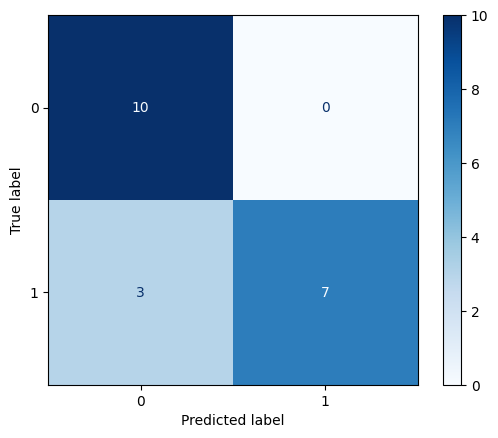

In [48]:
ConfusionMatrixDisplay.from_estimator(logreg_model, X_val, y_val, cmap=plt.cm.Blues)
plt.show()

# Task 4 - Misclassification Cost
For this task, you will perform the following steps:
- Compute the baseline misclassification cost
- Observe how the misclassification cost varies as the cut-off for classification is increased
- Compute the potentially best misclassification cost of the model on the validation data using the training data

In [49]:
# Obtain the predicted probabilities for the class 'Unsweetened' records in the training and the validation data using 'logreg_model'
# Hint: Study the documentation of the 'predict_proba()' method
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains the positive class probabilities
train_probabilities = logreg_model.predict_proba(X_train)[:, 1]
val_probabilities = logreg_model.predict_proba(X_val)[:, 1]

# Obtain predicted class labels for the training and the validation data using 'logreg_model'
# Hint: Study the documentation of the 'predict()' method
train_y_pred = logreg_model.predict(X_train)
val_y_pred = logreg_model.predict(X_val)

In [63]:
train_y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [60]:
y_train.count()

80

In [52]:
# Declare the cost of false positives and false negatives
# Note: The model will be used to send invitations to customers who potentially prefer unsweetened tea for a reveal party
# Note: The cost of false positives and false negatives are provided to you for this exercise
# Note: Labeling a customer who prefers sweetened tea as 'Unsweetened' leads to just sending a wrong invitation, so its cost is less
# Note: Labeling a customer who prefers unsweetened tea as 'Sweetened' leads to losing out on a potential customer, so its cost is more
fp_cost = 300
fn_cost = 1000

In [53]:
# Calculate the misclassification cost for the naive model on the training and the validation data
# Hint: The naive model in this case would classify everyone as preferring unsweetened tea or class 'Unsweetened'
# Hint: That means all class 'Unsweetened' people are classified as class 'Unsweetened' accurately
# Hint: The class 'Sweetened' people are the only ones that contribute to the misclassification
# Hint: So, you need to count how many 'y_train' and 'y_val' values are actually class 'Sweetened', since all of them are labeled as class 'Unsweetened'
# Hint: Recall the formula for the misclassification cost
train_mc_cost_0 = y_train[y_train == 0].count() *  fn_cost
val_mc_cost_0 = y_val[y_val == 0].count() *  fn_cost

print('The misclassification cost of classifying everyone in the training data as preferring unsweetened tea = {} dollars'.format(train_mc_cost_0))
print('The misclassification cost of classifying everyone in the validation data as preferring unsweetened tea = {} dollars'.format(val_mc_cost_0))

The misclassification cost of classifying everyone in the training data as preferring unsweetened tea = 40000 dollars
The misclassification cost of classifying everyone in the validation data as preferring unsweetened tea = 10000 dollars


In [70]:
# Generate a list of misclassification costs for various cut-off values for 'logreg_model' on the training and the validation data
# Hint: If the 'train_probabilities' or the 'val_probabilities' value is greater than the cut-off, then the label is class 'Unsweetened', else it's class 'Sweetened'
# Hint: Try using the 'np.where()' method to obtain the predictions for each cut-off value
train_mc_cost = []
val_mc_cost = []
cutoffs = np.arange(0, 1, 0.01)
for cutoff in cutoffs:
    curr_preds = np.where(train_probabilities > cutoff, 1, 0)
    train_curr_cf = confusion_matrix(y_train, curr_preds)
    train_fp_count = train_curr_cf[0, 1]
    train_fn_count = train_curr_cf[1, 0]
    train_mc_cost_current = train_fp_count * fp_cost + train_fn_count * fn_cost
    train_mc_cost.append(train_mc_cost_current)
    
    curr_preds = np.where(val_probabilities > cutoff, 1, 0)
    val_curr_cf = confusion_matrix(y_val, curr_preds)
    val_fp_count = val_curr_cf[0, 1]
    val_fn_count = val_curr_cf[1, 0]
    val_mc_cost_current = val_fp_count * fp_cost + val_fn_count * fn_cost
    val_mc_cost.append(val_mc_cost_current)

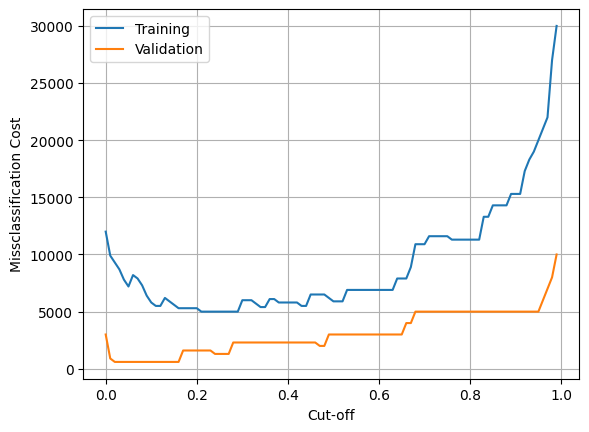

In [72]:
plt.plot(cutoffs, train_mc_cost, label="Training")
plt.plot(cutoffs, val_mc_cost, label="Validation")
plt.xlabel('Cut-off')
plt.ylabel('Missclassification Cost')
plt.legend()
plt.grid()
plt.show()

In [71]:
# Use the cut-off associated with the minimum misclassification cost on the training data to get the best cost for the validation data
# Hint: The expected best misclassification cost on the validation data is the cost associated with the best cut-off from the training data
# Note: The best cut-off for the training data is the cut-off associated with the minimum misclassification cost for the training data

best_cost = min(train_mc_cost)

best_cutoff = cutoffs[train_mc_cost.index(best_cost)]
best_valcost= val_mc_cost[train_mc_cost.index(best_cost)]
print('Best Misclassification Cost on the training is %.2f at Cut-off %.3f' % (best_cost, best_cutoff));
print('Best misclassification cost on the validation data for the model = {} dollars'.format(best_valcost))

Best Misclassification Cost on the training is 5000.00 at Cut-off 0.210
Best misclassification cost on the validation data for the model = 1600 dollars
